In [1]:
from aperturedb.CommonLibrary import create_connector
import os

APERTURE_API_KEY = os.getenv("APERTURE_API_KEY")
client = create_connector(
	key=APERTURE_API_KEY
)
response, _ = client.query([{"GetStatus": {}}])

client.print_last_response()

[
    {
        "GetStatus": {
            "info": "OK",
            "status": 0,
            "system": "ApertureDB",
            "version": "0.18.19"
        }
    }
]


In [2]:
from aperturedb.Utils import Utils
from aperturedb.CommonLibrary import create_connector

# Create the connector for ApertureDB
client = create_connector()

# Use the connector to create a Utils object and print the summary
utils = Utils(client)
utils.summary()

================== Summary ==================
Database: test-it-wvwxyk9b.farm0004.cloud.aperturedata.io
Version: 0.18.19
Status:  0
Info:    OK
------------------ Entities -----------------
Total entities types:    1
_DescriptorSet      
  Total elements: 1
    Number   | _dimensions             |         1 (100%)
    String   | _name                   |         1 (100%)
    String   | embeddings              |         1 (100%)
    String   | embeddings_fingerprint  |         1 (100%)
    String   | embeddings_model        |         1 (100%)
    String   | embeddings_pretrained   |         1 (100%)
  ! String   | embeddings_provider     |         1 (100%)
    String   | ocr_method              |         1 (100%)
    String   | source_type             |         1 (100%)
    String   | type                    |         1 (100%)
---------------- Connections ----------------
Total connections types: 0
------------------ Totals -------------------
Total nodes: 1
Total edges: 0


In [3]:
# Get the script to generate the data.json
!wget https://github.com/aperture-data/Cookbook/raw/refs/heads/main/scripts/convert_ingredients_adb_csv.py

# Run the script to generate the right CSV files
!python convert_ingredients_adb_csv.py

zsh:1: command not found: wget
python: can't open file '/Users/animaznman/Library/CloudStorage/OneDrive-Personal/Documents/Coding/aws_ai_hack_day/convert_ingredients_adb_csv.py': [Errno 2] No such file or directory


In [4]:
from aperturedb.ImageDataCSV import ImageDataCSV
from aperturedb.EntityDataCSV import EntityDataCSV
from aperturedb.ConnectionDataCSV import ConnectionDataCSV
from aperturedb.CommonLibrary import create_connector, execute_query
from tqdm.auto import tqdm

dishes_objects = ImageDataCSV("dishes.adb.csv")
ingredients_objects = EntityDataCSV("ingredients.adb.csv")
connection_objects = ConnectionDataCSV("dish_ingredients.adb.csv")

pbar= tqdm(total=len(dishes_objects) + len(ingredients_objects) + len(connection_objects))
client = create_connector()

for objects in [dishes_objects, ingredients_objects, connection_objects]:
    for query, blobs in objects:
        result, response, output_blobs = execute_query(client, query, blobs)

        if result != 0:
            print(response, query)
            break
        pbar.update(1)

  0%|          | 0/164 [00:00<?, ?it/s]

In [6]:
! wget https://github.com/aperture-data/Cookbook/raw/refs/heads/main/scripts/load_cookbook_data.sh
! bash load_cookbook_data.sh


from aperturedb.cli.ingest import from_csv, TransformerType, IngestType

from_csv(
    filepath="data/dishes.adb.csv",
    ingest_type=IngestType.IMAGE,
    transformer=[
        TransformerType.clip_pytorch_embeddings,
        TransformerType.image_properties,
        TransformerType.common_properties]
    )

from_csv(
    filepath="data/ingredients.adb.csv",
    ingest_type=IngestType.ENTITY,
)

from_csv(
    filepath="data/dish_ingredients.adb.csv",
    ingest_type=IngestType.CONNECTION,
)

--2025-11-04 14:11:25--  https://github.com/aperture-data/Cookbook/raw/refs/heads/main/scripts/load_cookbook_data.sh
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aperture-data/Cookbook/refs/heads/main/scripts/load_cookbook_data.sh [following]
--2025-11-04 14:11:25--  https://raw.githubusercontent.com/aperture-data/Cookbook/refs/heads/main/scripts/load_cookbook_data.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481 [text/plain]
Saving to: ‘load_cookbook_data.sh’

load_cookbook_data. 100%[===================>]     481  --.-KB/s    in 0s      

2025-11-04 14:11:25 (10.4 MB/s) - ‘load_cookbo

100%|███████████████████████████████████████| 335M/335M [00:22<00:00, 15.6MiB/s]


  0%|          | 0.00/107M [00:00<?, ?B/s]

[14:12:37] Applying Pipeline:                                                                          ]8;id=978279;file:///opt/anaconda3/envs/aws_hack/lib/python3.12/site-packages/aperturedb/cli/ingest.py\ingest.py]8;;\:]8;id=134610;file:///opt/anaconda3/envs/aws_hack/lib/python3.12/site-packages/aperturedb/cli/ingest.py#53\53]8;;\
           CLIPPyTorchEmbeddings[{'adb_data_source': 'IngestType.IMAGE.dishes.adb.csv'}]                           
           =>ImageProperties[{'adb_data_source': 'IngestType.IMAGE.dishes.adb.csv'}]                               
           =>CommonProperties[{'adb_data_source': 'IngestType.IMAGE.dishes.adb.csv'}]                              

sample_count 30


Progress: 100%|██████████| 30.0/30.0 [00:22<00:00, 1.36items/s]


============ ApertureDB Loader Stats ============
Total time (s): 22.082631826400757
Total queries executed: 30
Avg Query time (s): 0.4106115500132243
Query time std: 0.2698520250969517
Avg Query Throughput (q/s): 2.435391795403207
Overall insertion throughput (element/s): 1.3585337216976865
Total inserted elements: 30
Total successful commands: 60
sample_count 65


Progress: 100%|██████████| 65.0/65.0 [00:13<00:00, 4.98items/s]


============ ApertureDB Loader Stats ============
Total time (s): 13.05679202079773
Total queries executed: 65
Avg Query time (s): 0.1866363158592811
Query time std: 0.14307096348078957
Avg Query Throughput (q/s): 5.358014035992727
Overall insertion throughput (element/s): 4.978251924091588
Total inserted elements: 65
Total successful commands: 65
sample_count 69


Progress: 100%|██████████| 69.0/69.0 [00:13<00:00, 5.29items/s]

============ ApertureDB Loader Stats ============
Total time (s): 13.05426812171936
Total queries executed: 69
Avg Query time (s): 0.17667570666990418
Query time std: 0.13815556196420237
Avg Query Throughput (q/s): 5.660087732765497
Overall insertion throughput (element/s): 5.285627609042253
Total inserted elements: 69
Total successful commands: 207


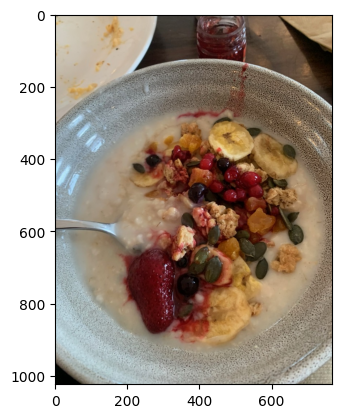

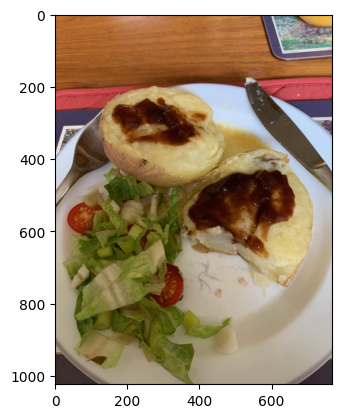

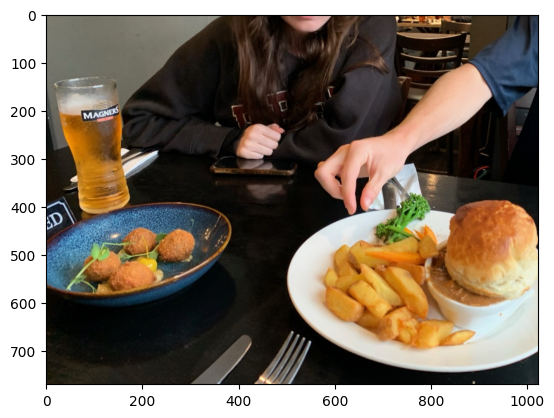

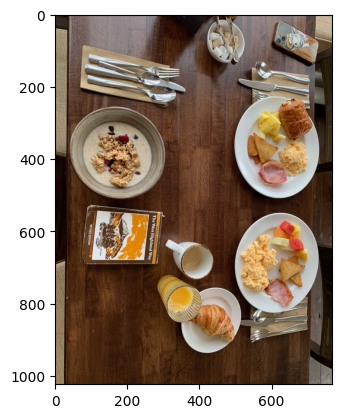

In [12]:
from aperturedb.Images import Images
from aperturedb.Constraints import Constraints

# Create an Images wrapper object
images = Images(client)

# Search
images.search(
    constraints=Constraints().equal("cuisine", "Scottish"),
    limit=20,
)

# display result
images.display()

[{'FindEntity': {'returned': 0, 'status': 0}}, {'FindEntity': {'returned': 0, 'status': 0}}, {'FindImage': {'blobs_start': 0, 'entities': [{'Recipe URL': 'https://www.indianhealthyrecipes.com/butter-chicken/', '_blob_index': 0, '_uniqueid': '7.3.180', 'caption': 'Chicken in Creamy tomato based gravy', 'contributor': 'gautam', 'cuisine': 'Indian', 'id': 4, 'location': 'NJ', 'name': 'Butter chicken', 'type': 'main dish', 'wf_ocr_done': True}, {'Recipe URL': 'https://www.tajmahal-oban.co.uk/', '_blob_index': 1, '_uniqueid': '7.7.260', 'caption': 'Butter chicken, special fried rice, garlic naan, peshwari naan', 'contributor': 'gavin', 'cuisine': 'Indian', 'id': 8, 'location': 'UK', 'name': 'butter chicken with special fried rice and assorted naan breads', 'type': 'main dish', 'wf_ocr_done': True}], 'returned': 2, 'status': 0}}]


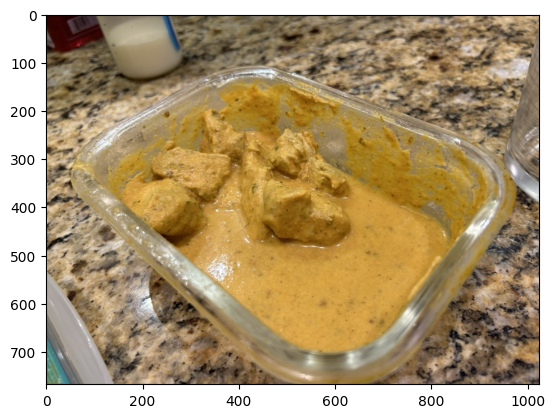

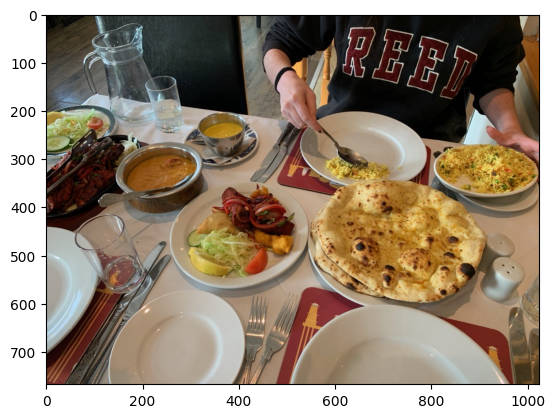

In [13]:
from aperturedb.CommonLibrary import create_connector, execute_query
from aperturedb.NotebookHelpers import display

query = [
    { # Find an ingredient with the name "butter"
    "FindEntity": {
        "with_class": "Ingredient",
        "constraints": {
        "name": [
            "==",
            "butter"
        ]
        },
        "_ref": 1, # forward reference
    }
    },
    { # Find an ingredient with the name "chicken"
    "FindEntity": {
        "with_class": "Ingredient",
        "constraints": {
        "name": [
            "==",
            "chicken"
        ]
        },
        "_ref": 2 # forward reference
    }
    },
    { # Find an image connected to both ingredients
    "FindImage": {
        "blobs": True,
        "is_connected_to": {
        "all": [ # Must be connected to all ingredients
            {
            "ref": 1, # backward reference
            },
            {
            "ref": 2, # backward reference
            }
        ]
        },
        "results": {
        "limit": 5, # Maximum of five results
        "all_properties": True # Return all properties
        }
    }
    }
]
client = create_connector()
result, response, blobs = execute_query(client, query, [])

# Print the response
print(response)

# Check if the query was successful
if result == 0:
    display(blobs)


[{'FindDescriptor': {'entities': [{'_distance': 0.3134409487247467}, {'_distance': 0.3042328953742981}, {'_distance': 0.3033159375190735}], 'returned': 3, 'status': 0}}, {'FindImage': {'blobs_start': 0, 'entities': [{'Recipe URL': 'https://www.indianhealthyrecipes.com/paneer-bhurji-recipe/', '_blob_index': 0, '_uniqueid': '7.1.140', 'caption': 'Scrambled cottage cheese with finely chopped onion, bell pepper and tomatoes', 'contributor': 'gautam', 'cuisine': 'Indian', 'id': 2, 'location': 'NJ', 'name': 'paneer bhurji', 'type': 'main dish', 'wf_ocr_done': True}, {'Recipe URL': 'https://spicecravings.com/moong-dal', '_blob_index': 1, '_uniqueid': '7.2.160', 'caption': 'Yellow petite lentils', 'contributor': 'gautam', 'cuisine': 'Indian', 'id': 3, 'location': 'NJ', 'name': 'moong dal', 'type': 'main dish', 'wf_ocr_done': True}, {'Recipe URL': 'https://www.allrecipes.com/recipe/20198/spanish-potato-omelet/', '_blob_index': 2, '_uniqueid': '7.24.600', 'caption': 'Egg potatoes onions and moza

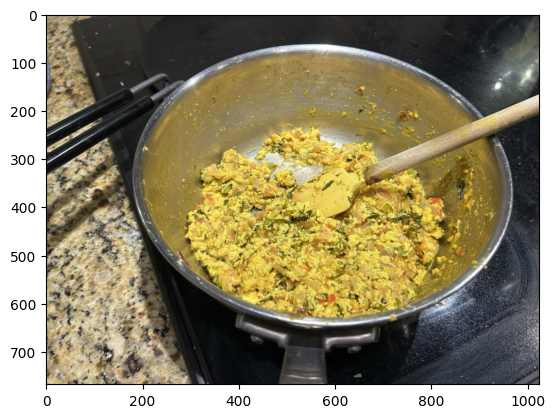

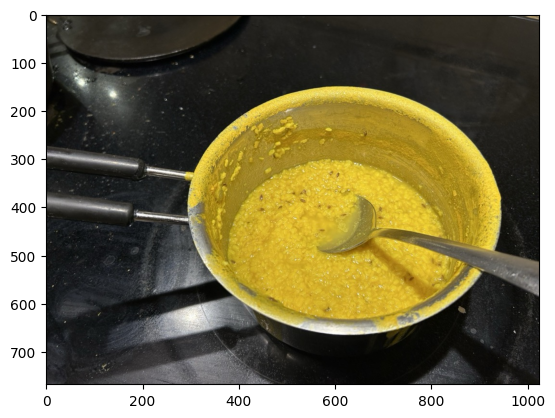

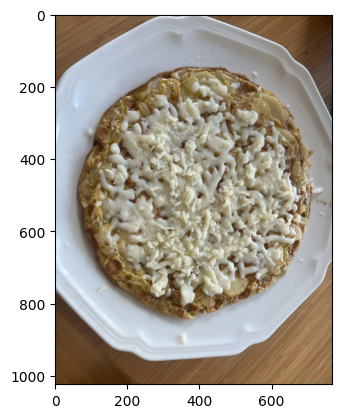

In [18]:
from aperturedb.CommonLibrary import create_connector, execute_query
from aperturedb.NotebookHelpers import display
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

search_tokens = clip.tokenize([f"a recipe using eggs"]).to(device)
search_embeddings = model.encode_text(search_tokens)

query = [{
    "FindDescriptor": {
        "set": "ViT-B/16", # Name of descriptor set to use
        "k_neighbors": 3, # How many results to return
        "distances": True, # Also return distances (as _distance property)
        "blobs": False, # Don't return vectors of matching descriptors
        "_ref": 1 # forward reference
    }
}, {
    "FindImage": {
        "blobs": True, # Return image binary data
        "is_connected_to": {
            "ref": 1 # backward reference
        },
        "results": {
            "all_properties": True # Return all properties
        }
    }
}]

if device == "cuda":
    search_embeddings = search_embeddings.float()
    blobs = search_embeddings[0].cpu().detach().numpy().tobytes()
else:
    blobs = search_embeddings[0].detach().numpy().tobytes()

client = create_connector()
result, response, blobs = execute_query(client, query, [blobs])

# Print the response
print(response)

# Check if the query was successful
if result == 0:
    display(blobs)
